<center>
    <img src="https://sbu.ac.ir/documents/46019/275501/logo-dark.png" alt="sbu" class="center">
</center>


# <center>Data Mining Course - Project #2</center>
<center>
    <b>Professors:</b>
    <br>
Dr. Farahani, Dr. Kheradpishe
    <br><br><br>
Ali Nikkhah - 99422197
    <br><br>
April 2021
    <br><br>
</center>


# 1.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
hearts = pd.read_csv("heart.csv")

display(hearts.shape)
hearts.head(10)

(303, 14)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
hearts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


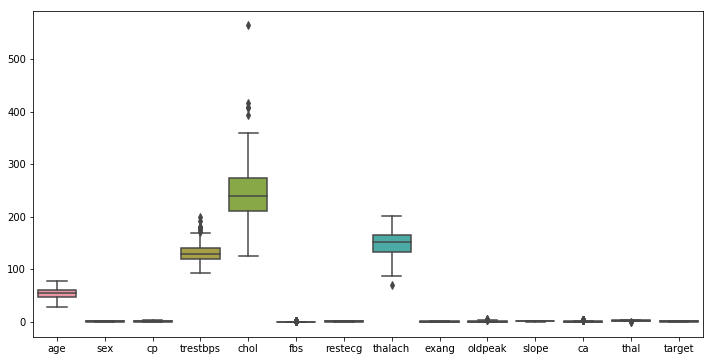

In [4]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(data=hearts)

Data Normalization:

$$X_{norm} = \frac{X-X_{min}}{X_{max}-X_{min}}$$

lets normalize data based on "target" column.
<br>

In [5]:
from sklearn import preprocessing


In [6]:
y = hearts.target.values
x_data = hearts.drop(['target'], axis = 1)

norm_data = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
norm_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


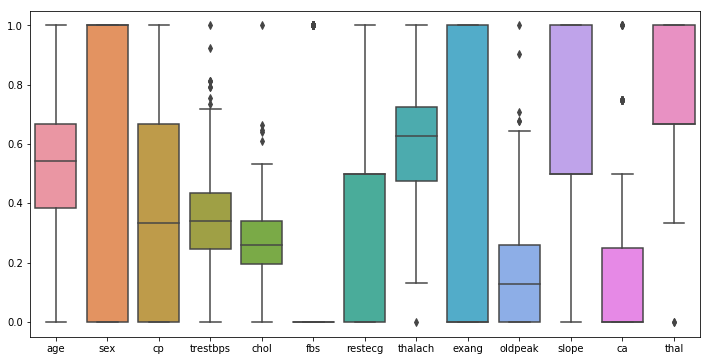

In [7]:
fig = plt.figure(figsize=(12,6))
sns.boxplot(data=norm_data)

outlier data in trestbps, chol, fbs, oldpeak

now, lets remove them with z_score scale!

In [8]:
z_scores = stats.zscore(hearts)
z_scores
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
clean_data = hearts[filtered_entries]

16 rows removed.

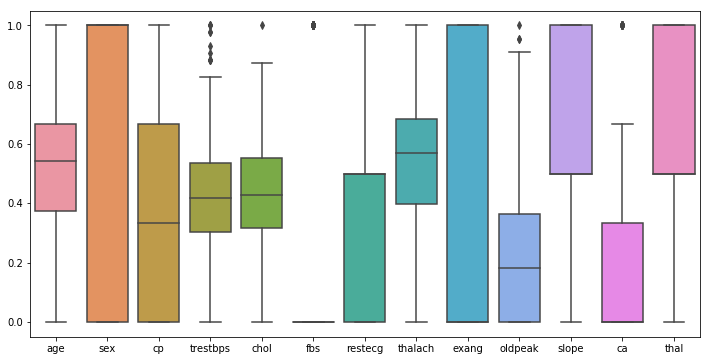

In [9]:
fig = plt.figure(figsize=(12,6))
y = clean_data.target.values
x_data = clean_data.drop(['target'], axis = 1)

norm_data = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
sns.boxplot(data=norm_data)

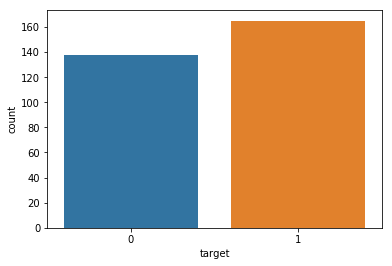

In [10]:
sns.countplot(x="target", data=hearts)
plt.show()

In [11]:
countNoDisease = len(hearts[hearts.target == 0])
countHaveDisease = len(hearts[hearts.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(hearts.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(hearts.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


<br>
So, data are almost balanced!

If we have imbalanced data it can make problems on our calculations and accuracy but we can balancing by exploiting one of the following techniques:
-    oversampling
-    undersampling
-    class weight
-    threshold

# 2.

Spliting Data:
> 80% train<br>
> 20% test

In [12]:
from sklearn.model_selection import train_test_split

y = clean_data.target.values
x_train, x_test, y_train, y_test = train_test_split(clean_data,y,test_size = 0.2,random_state=42)


# 3.

Bayes' theorem is stated mathematically as the following equation:

$$P(A\mid B)=\frac{P(B\mid A)P(A)}{P(B)}$$

where  ${\displaystyle A}$ and ${\displaystyle B}$ are events and ${\displaystyle P(B)\neq 0}$.
- $P(A\mid B)$ is a conditional probability: the probability of event ${\displaystyle A}$ occurring given that ${\displaystyle B}$ is true. It is also called the posterior probability of ${\displaystyle A}$ given ${\displaystyle B}$.
-  ${\displaystyle P(B\mid A)}$ is also a conditional probability: the probability of event ${\displaystyle B}$ occurring given that ${\displaystyle A}$ is true. It can also be interpreted as the likelihood of ${\displaystyle A}$ given a fixed ${\displaystyle B}$ because ${\displaystyle P(B\mid A)=L(A\mid B)}$.
- ${\displaystyle P(A)}$ and ${\displaystyle P(B)}$ are the probabilities of observing ${\displaystyle A}$ and ${\displaystyle B}$ respectively without any given conditions; they are known as the marginal probability or prior probability.
- ${\displaystyle A}$ and ${\displaystyle B}$ must be different events.

__Bernoulli Naive Bayes__ : It assumes that all our features are binary such that they take only two values. like "target" which means 0 = “have not disease” and 1 = "have disease".

__Multinomial Naive Bayes__ : Its is used when we have discrete data (e.g. movie ratings ranging 1 and 5 as each rating will have certain frequency to represent).

__Gaussian Naive Bayes__ : Because of the assumption of the normal distribution, Gaussian Naive Bayes is used in cases when all our features are continuous.

# 4.

__Gaussian Naive Bayes Implementation__

Gaussian Naive Bayes is an algorithm having a Probabilistic Approach. It involves prior and posterior probability calculation of the classes in the dataset and the test data given a class respectively.

$$Prior Probability(c) = \frac{\text{No.  of instances of class } c}{\text{Total No. of instances in the dataset}}$$

The conditional probabilities of the test data features given a class the conditional probabilities of the test data features given a class is given by the probability obtained from Gaussian (Normal) Distribution.

$$P(x_i\mid c)=\frac{1}{\sqrt{2\pi\sigma^2}}e(-\frac{(x_i-mean_{x_i,c})^2}{2\sigma^2})$$

Finally, the conditional probability of each class given an instance (test instance) is calculated using Bayes Theorem.

$$P(c_i\mid x)=\frac{P(x\mid c_i)P(c_i)}{\sum_{j} P(x\mid c_j)P(c_j)}$$



# 5.

In [13]:
import math

ATTR_NAMES = ["thalach", "trestbps", "chol"]
FIELD_NAMES = ["Num"] + ATTR_NAMES + ["target"]

class GNB_classifier(object):

    def __init__(self, training_set, test_set):
        self.__training_set = training_set
        self.__test_set = test_set
        self.__n = len(self.__training_set)
        self.__prior()
        self.__calculate_mean_variance()

    def __prior(self):
        counts = self.__training_set["target"].value_counts().to_dict()
        self.__priors = {(k, v / self.__n) for k, v in counts.items()}

    def __calculate_mean_variance(self):
        self.__mean_variance = {}
        for c in self.__training_set["target"].unique():
            filtered_set = self.__training_set[
                (self.__training_set['target'] == c)]
            m_v = {}
            for attr_name in ATTR_NAMES:
                m_v[attr_name] = []
                m_v[attr_name].append(filtered_set[attr_name].mean())
                m_v[attr_name].append(
                    math.pow(filtered_set[attr_name].std(), 2))
            self.__mean_variance[c] = m_v

    @staticmethod
    def __calculate_probability(x, mean, variance):
        exponent = math.exp(-(math.pow(x - mean, 2) / (2 * variance)))
        return (1 / (math.sqrt(2 * math.pi * variance))) * exponent

    def predict(self):
        predictions = {}
        for _, row in self.__test_set.iterrows():
            results = {}
            for k, v in self.__priors:
                p = 0
                for attr_name in ATTR_NAMES:
                    prob = self.__calculate_probability(row[attr_name], self.__mean_variance[
                        k][attr_name][0], self.__mean_variance[k][attr_name][1])
                    if prob > 0:
                        p += math.log(prob)
                results[k] = math.log(v) + p
            predictions[int(row._name)] = max([key for key in results.keys() if results[
                key] == results[max(results, key=results.get)]])
        return predictions

    def print_info(self):
        print("Priors for each class: ", self.__priors)
        print("Means and variance for each class: ", self.__mean_variance)

        
def calculate_accuracy(test_set, predictions):
    correct = 0
    for _, t in test_set.iterrows():
        if t["target"] == predictions[t._name]:
            correct += 1
    return (correct / len(test_set)) * 100.0

In [14]:
classifier = GNB_classifier(x_train, x_test)
classifier.print_info()


Priors for each class:  {(1, 0.537117903930131), (0, 0.462882096069869)}
Means and variance for each class:  {1: {'thalach': [158.609756097561, 386.3054778088764], 'trestbps': [129.08130081300814, 251.4851392776223], 'chol': [244.7560975609756, 2221.3170731707323]}, 0: {'thalach': [139.78301886792454, 479.37151841868825], 'trestbps': [134.06603773584905, 324.5384546271339], 'chol': [247.10377358490567, 2161.6557951482478]}}


In [15]:
predictions = classifier.predict()
print("Predictions in the form (number, predicted class): ", predictions)

Predictions in the form (number, predicted class):  {9: 1, 269: 0, 148: 1, 224: 0, 241: 0, 205: 1, 101: 0, 75: 1, 113: 1, 34: 0, 143: 1, 216: 0, 147: 1, 282: 0, 5: 1, 234: 0, 249: 1, 268: 0, 46: 1, 285: 0, 250: 0, 58: 1, 159: 1, 160: 1, 117: 1, 112: 0, 156: 1, 150: 0, 115: 1, 43: 1, 116: 1, 151: 0, 180: 0, 222: 1, 47: 1, 84: 0, 65: 1, 122: 1, 77: 1, 172: 1, 152: 0, 31: 1, 22: 1, 24: 1, 191: 0, 267: 0, 87: 1, 183: 1, 284: 0, 97: 1, 214: 1, 179: 0, 185: 1, 171: 1, 6: 1, 79: 1, 201: 1, 62: 1}


In [16]:
accuracy = calculate_accuracy(x_test, predictions)
print("Accuracy : ", accuracy)

Accuracy :  72.41379310344827


# 5.

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = [ value for key,value in predictions.items()]

print("Precision:")
my_p_score = precision_score(y_test, y_pred)  
my_p_score * 100

Precision:


75.67567567567568

In [18]:
print("Recall:")
my_recall_score = recall_score(y_test, y_pred)
my_recall_score * 100

Recall:


80.0

In [19]:
print("F1 Score:")
my_f1_score = f1_score(y_test, y_pred)
my_f1_score * 100

F1 Score:


77.77777777777779

# 6.

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

x = clean_data[["thalach", "trestbps", "chol"]]
y = clean_data.target.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)

model = GaussianNB()
model.fit(x_train, y_train)
sk_y_pred = model.predict(x_test)

In [21]:
accuracy = accuracy_score(y_test, sk_y_pred)
print("Accuracy : ", accuracy * 100)

Accuracy :  72.41379310344827


# 7.

In [22]:
print("Precision:")
p_score = precision_score(y_test, sk_y_pred)  
print(p_score * 100)

print("\nMy Precision:")
print(my_p_score * 100)

Precision:
67.56756756756756

My Precision:
75.67567567567568


In [23]:
print("Recall:")
recall_score = recall_score(y_test, sk_y_pred)
print(recall_score * 100)

print("\nMy Recall:")
print(my_recall_score * 100)


Recall:
86.20689655172413

My Recall:
80.0


In [24]:
print("F1 Score:")
f1_score = f1_score(y_test, sk_y_pred)
print(f1_score * 100)

print("\nMy F1 Score:")
print(my_f1_score * 100)

F1 Score:
75.75757575757575

My F1 Score:
77.77777777777779


# 8.

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svc =  SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc_score = accuracy_score(y_test, svc_pred)

accuracy = accuracy_score(y_test, svc_pred)
print("Accuracy : ", accuracy * 100)

print(classification_report(y_test,svc_pred))

Accuracy :  72.41379310344827
              precision    recall  f1-score   support

           0       0.88      0.52      0.65        29
           1       0.66      0.93      0.77        29

    accuracy                           0.72        58
   macro avg       0.77      0.72      0.71        58
weighted avg       0.77      0.72      0.71        58



# 9.

In [26]:
svc =  SVC(kernel="linear")
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc_score = accuracy_score(y_test, svc_pred)

accuracy = accuracy_score(y_test, svc_pred)
print("Accuracy : ", accuracy * 100)

print(classification_report(y_test,svc_pred))

Accuracy :  77.58620689655173
              precision    recall  f1-score   support

           0       0.86      0.66      0.75        29
           1       0.72      0.90      0.80        29

    accuracy                           0.78        58
   macro avg       0.79      0.78      0.77        58
weighted avg       0.79      0.78      0.77        58



In [27]:
svc =  SVC(kernel="poly")
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc_score = accuracy_score(y_test, svc_pred)

accuracy = accuracy_score(y_test, svc_pred)
print("Accuracy : ", accuracy * 100)

print(classification_report(y_test,svc_pred))

Accuracy :  70.6896551724138
              precision    recall  f1-score   support

           0       0.77      0.59      0.67        29
           1       0.67      0.83      0.74        29

    accuracy                           0.71        58
   macro avg       0.72      0.71      0.70        58
weighted avg       0.72      0.71      0.70        58



The SVM algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. SVM uses a technique called the kernel trick. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space. In other words, you can say that it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps you to build a more accurate classifier.

__Radial Basis Function Kernel__ The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space.

__Linear Kernel__ A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.

__Polynomial Kernel__ A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space.

# 10.

In [28]:
y = clean_data.target.values
x_train, x_test, y_train, y_test = train_test_split(clean_data.drop('target',axis=1),y,test_size = 0.2,random_state=0)

svc =  SVC(kernel="linear")
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc_score = accuracy_score(y_test, svc_pred)

accuracy = accuracy_score(y_test, svc_pred)
print("Accuracy : ", accuracy * 100)

print(classification_report(y_test,svc_pred))

Accuracy :  91.37931034482759
              precision    recall  f1-score   support

           0       0.93      0.90      0.91        29
           1       0.90      0.93      0.92        29

    accuracy                           0.91        58
   macro avg       0.91      0.91      0.91        58
weighted avg       0.91      0.91      0.91        58



# 11.

In [29]:
from sklearn.model_selection import cross_val_score

svc =  SVC(kernel="linear")

cv5 = cross_val_score(svc, x_train, y_train, cv=5)

print(cv5)
print("Accuracy: ", round(cv5.mean(), 2) * 100)

[0.86956522 0.82608696 0.7826087  0.82608696 0.82222222]
Accuracy:  83.0


# 12.

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_acc_score = accuracy_score(y_test, knn_pred)
print("Accuracy:",knn_acc_score*100)
print("\n")
print(classification_report(y_test,knn_pred))


Accuracy: 77.58620689655173


              precision    recall  f1-score   support

           0       0.83      0.69      0.75        29
           1       0.74      0.86      0.79        29

    accuracy                           0.78        58
   macro avg       0.78      0.78      0.77        58
weighted avg       0.78      0.78      0.77        58



# 13.

In KNN, finding the value of k is not easy. A small value of k means that noise will have a higher influence on the result and a large value make it computationally expensive. Data scientists usually choose as an odd number if the number of classes is 2 and another simple approach to select k is set k=sqrt(n).

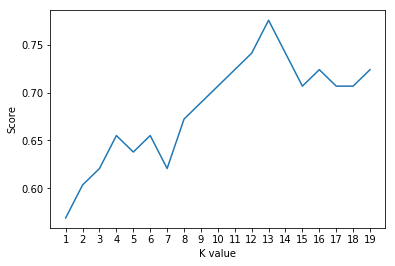

Maximum KNN Score is 77.59%


In [31]:
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100

print("Maximum KNN Score is {:.2f}%".format(acc))

# 14.

In [32]:
x = clean_data[["thalach", "trestbps", "chol"]]
y = clean_data.target.values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=0)


knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_acc_score = accuracy_score(y_test, knn_pred)
print("Accuracy:",knn_acc_score*100)
print("\n")
print(classification_report(y_test,knn_pred))


Accuracy: 72.41379310344827


              precision    recall  f1-score   support

           0       0.78      0.62      0.69        29
           1       0.69      0.83      0.75        29

    accuracy                           0.72        58
   macro avg       0.73      0.72      0.72        58
weighted avg       0.73      0.72      0.72        58



# 15.

__Parametric Methods__

A learning model that summarizes data with a set of parameters of fixed size (independent of the number of training examples) is called a parametric model. No matter how much data you throw at a parametric model, it won’t change its mind about how many parameters it needs.

Some examples of parametric algorithms include:

-    Logistic Regression
-    Linear Discriminant Analysis
-    Perceptron
-    Naive Bayes
-    Simple Neural Networks

Benefits of Parametric Algorithms:

-    Simpler: These methods are easier to understand and interpret results.
-    Speed: Parametric models are very fast to learn from data.
-    Less Data: They do not require as much training data and can work well even if the fit to the data is not perfect.

Limitations of Parametric Algorithms:

-    Constrained: By choosing a functional form these methods are highly constrained to the specified form.
-    Limited Complexity: The methods are more suited to simpler problems.
-    Poor Fit: In practice the methods are unlikely to match the underlying mapping function.
    
__Nonparametric methods__ 

Nonparametric methods are good when you have a lot of data and no prior knowledge, and when you don’t want to worry too much about choosing just the right features.

An easy to understand nonparametric model is the k-nearest neighbors algorithm that makes predictions based on the k most similar training patterns for a new data instance. The method does not assume anything about the form of the mapping function other than patterns that are close are likely to have a similar output variable.

Some more examples of popular nonparametric algorithms are:

-    k-Nearest Neighbors
-    Decision Trees like CART and C4.5
-    Support Vector Machines

Benefits of Nonparametric Algorithms:

-    Flexibility: Capable of fitting a large number of functional forms.
-    Power: No assumptions (or weak assumptions) about the underlying function.
-    Performance: Can result in higher performance models for prediction.

Limitations of Nonparametric Algorithms:

-    More data: Require a lot more training data to estimate the mapping function.
-    Slower: A lot slower to train as they often have far more parameters to train.
-    Overfitting: More of a risk to overfit the training data and it is harder to explain why specific predictions are made.


# 16.

MCC is a correlation coefficient between target and predictions. It generally varies between -1 and +1. -1 when there is perfect disagreement between actuals and prediction, 1 when there is a perfect agreement between actuals and predictions. 0 when the prediction may as well be random with respect to the actuals. As it involves values of all the four quardants of a confusion matrix, it is considered as a balanced measure.

Let's consider a case where the number of cases for either positive or negative is too low and the classifier returns either of the TP or TN as 0, then averaging TPR and TNR will return a score without any direction.We cannot judge a model based on this score. MCC involves values of all the four quardants of a confusion matrix and being a balanced measure will return a value with a direction (+ve and -ve)

There is a great explanation on MCC and accuracy measures here:

https://lettier.github.io/posts/2016-08-05-matthews-correlation-coefficient.html
